<a href="https://colab.research.google.com/github/Shiva1906/DeepLearning/blob/GAN/GAN/SimpleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Simple GAN

##Installing required packages

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as Transforms
from torch.utils.data import Dataset,DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import cv2

##Downloading Datasets and Creating Dataloader for Train and Test



In [29]:
transforms = torchvision.transforms.Compose([Transforms.ToTensor(),
                                             Transforms.Normalize((0.1307,), (0.3081,)),
                                             ]
                                            )
train_data = datasets.MNIST(root="data",train=True,transform=transforms,download=True)
test_data = datasets.MNIST(root="data",train=False,transform=transforms,download=True)

train_dataloader = DataLoader(train_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=False)

##Discrimintor Model

In [31]:
class Discriminator(nn.Module):
  def __init__(self,):
    super(Discriminator,self).__init__()
    self.disc = nn.Sequential(
        nn.Linear(784,128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.disc(x)


##Generator Model

In [32]:
class Generator(nn.Module):
  def __init__(self,):
    super(Generator,self).__init__()
    self.gen = nn.Sequential(
        nn.Linear(768,128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,784),
        nn.Tanh()
    )
  def forward(self,x):
      return self.gen(x)

##Training

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [0/10] Batch 0/938           Loss D: 0.6777, loss G: 0.7226


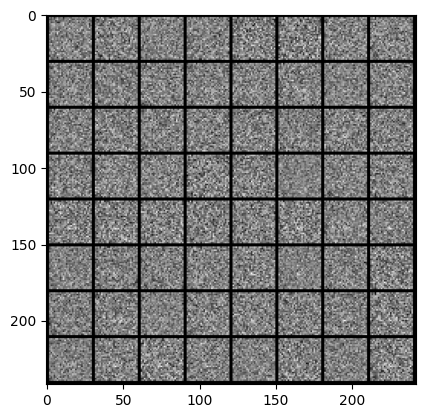

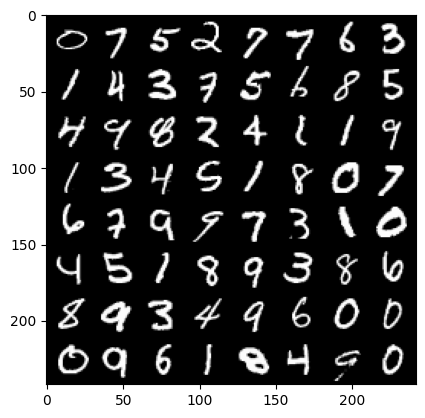

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [1/10] Batch 0/938           Loss D: 0.1736, loss G: 1.6714


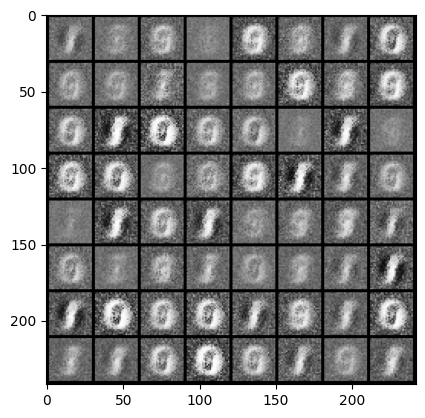

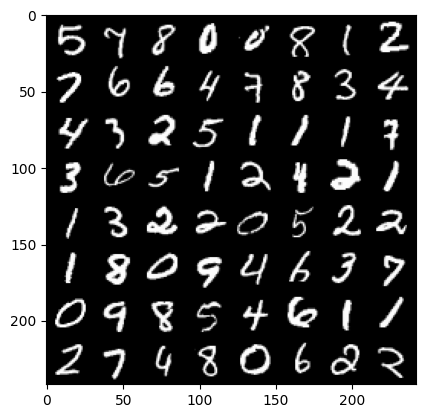

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/10] Batch 0/938           Loss D: 0.1925, loss G: 2.4081


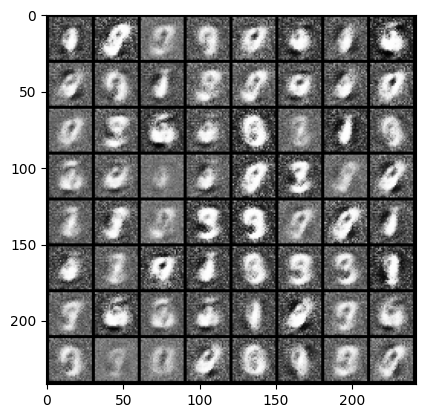

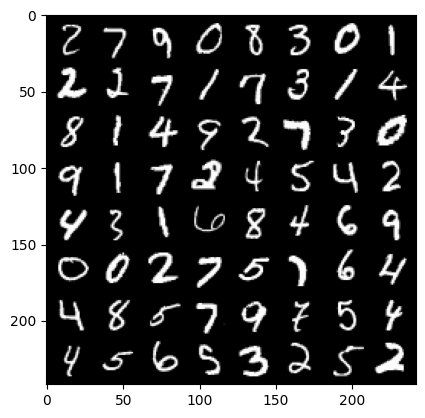

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/10] Batch 0/938           Loss D: 0.1783, loss G: 2.4333


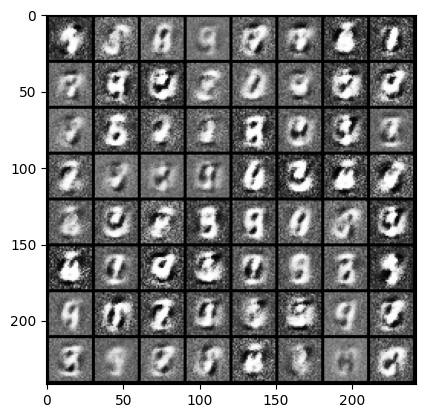

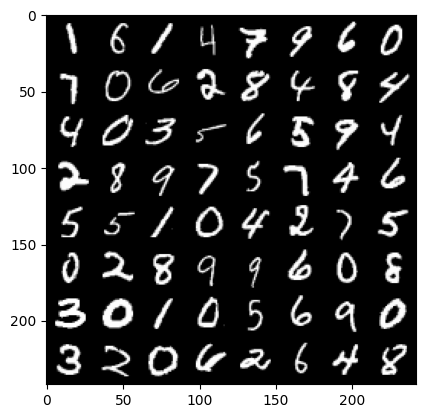

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/10] Batch 0/938           Loss D: 0.0592, loss G: 3.5043


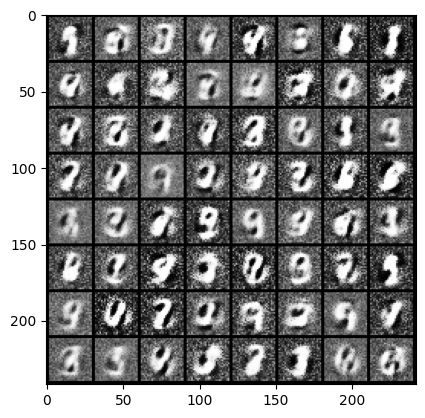

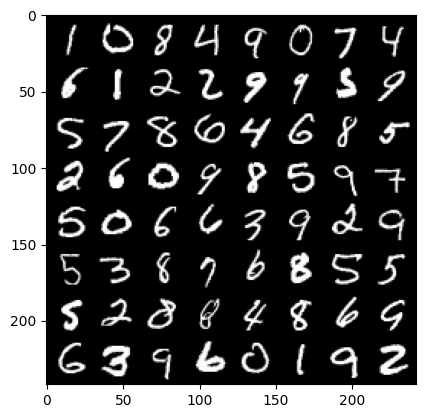

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/10] Batch 0/938           Loss D: 0.0580, loss G: 4.0955


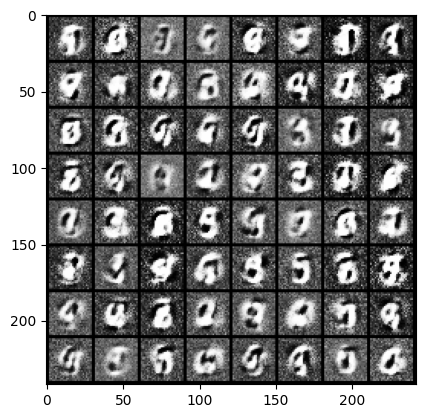

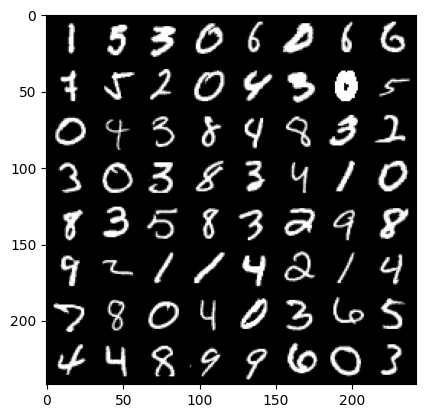

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [6/10] Batch 0/938           Loss D: 0.0308, loss G: 4.2721


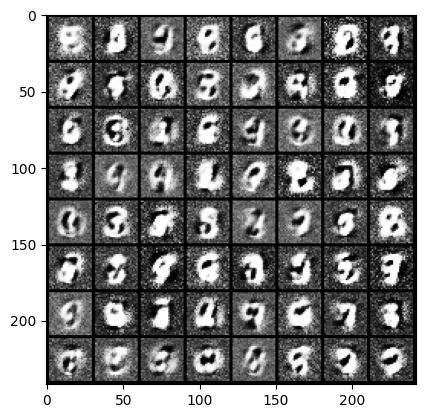

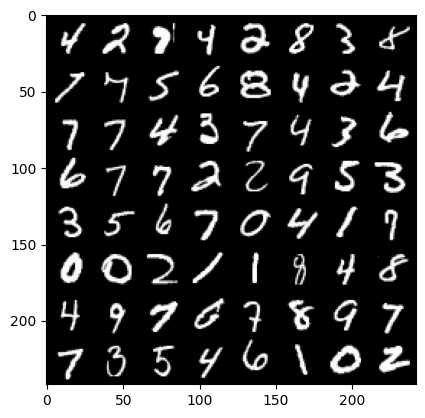

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [7/10] Batch 0/938           Loss D: 0.0635, loss G: 4.1096


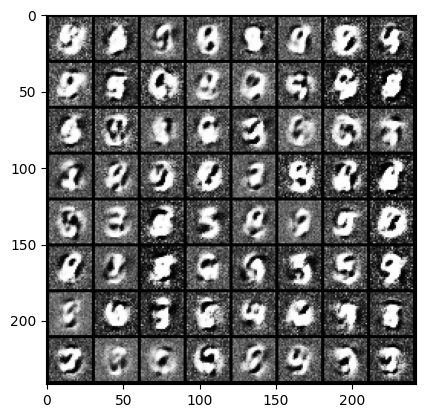

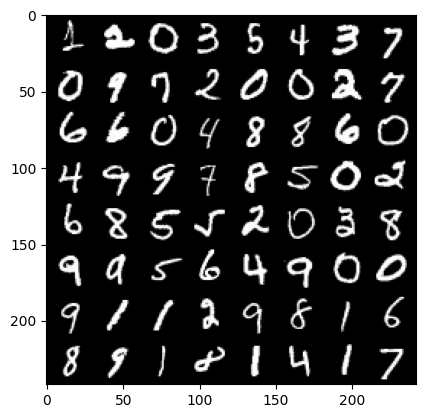

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [8/10] Batch 0/938           Loss D: 0.0264, loss G: 4.5530


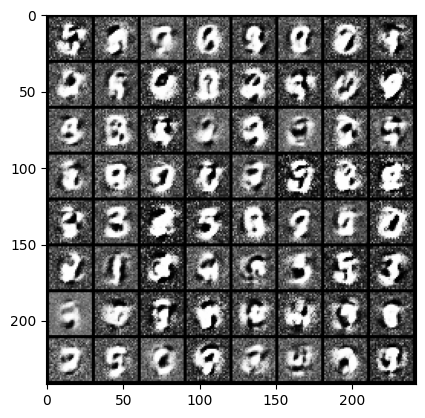

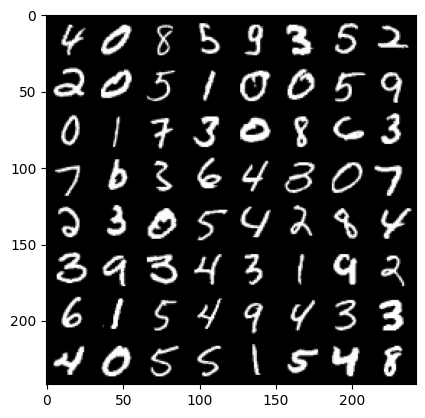

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [9/10] Batch 0/938           Loss D: 0.0247, loss G: 4.9004


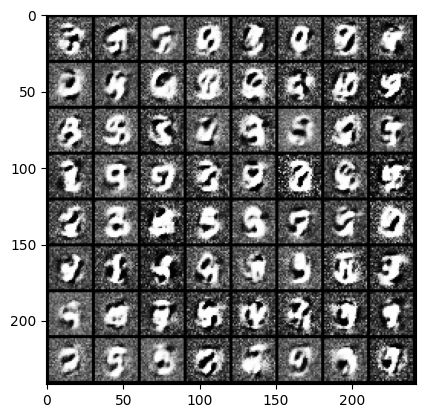

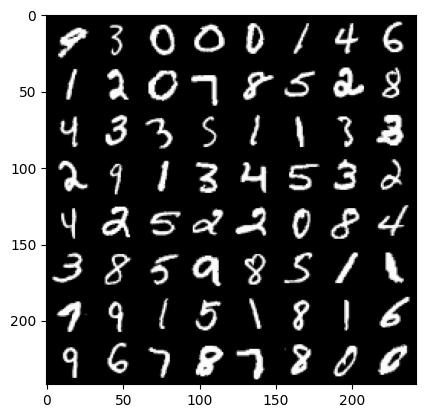

100%|██████████| 938/938 [00:18<00:00, 50.66it/s]


In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
gen = Generator().to(device)
disc = Discriminator().to(device)
loss = nn.BCELoss()
lr = 3e-4
epochs = 10
noise_dim = 768
batch_size = 64
opt_gen = torch.optim.Adam(gen.parameters(),lr=lr)
opt_disc = torch.optim.Adam(disc.parameters(),lr=lr)
fixed_noise = torch.randn((64,noise_dim))

for epoch in range(epochs):
  for batch_idx,(real,_) in enumerate(tqdm(train_dataloader)):
    real = real.view(-1,784).to(device)
    noise = torch.randn((batch_size,noise_dim)).to(device)
    fake = gen(noise)
    dis_real = disc(real)
    dis_fake = disc(fake)
    lossD = (loss(dis_real,torch.ones_like(dis_real)) + loss(dis_fake,torch.zeros_like(dis_fake)))/2
    disc.zero_grad()
    lossD.backward(retain_graph=True)
    opt_disc.step()

    fake = gen(noise)
    output = disc(fake).view(-1)
    lossG = loss(output,torch.ones_like(output))
    gen.zero_grad()
    lossG.backward()
    opt_gen.step()

    if batch_idx == 0:
      print(
          f"Epoch [{epoch}/{epochs}] Batch {batch_idx}/{len(train_dataloader)} \
          Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
      )
      with torch.no_grad():
        fake = gen(fixed_noise.to(device)).reshape(-1,1,28,28)
        data = real.reshape(-1,1,28,28)
        img_grid_fake = torchvision.utils.make_grid(fake,normalize=True)
        img_grid_real = torchvision.utils.make_grid(data,normalize=True)
        plt.imshow(img_grid_fake.cpu().detach().numpy().transpose(1,2,0))
        plt.show()
        plt.imshow(img_grid_real.cpu().detach().numpy().transpose(1,2,0))
        plt.show()
